# Homework 2

### Nicole Caicedo

1. Use assembly to solve the following problems:
    1. Obtain the 50th Fibonacci number
    2. Find out if a given year is leap
    3. Given an array of integers, calculate the average
    4. Write a program to transform from Celsius to Fahrenheit and vice versa
    



In [2]:
org 100h

jmp start


num1 dw 1
num2 dw 1

start:
  
mov 	cx, 20 ;	counter (for the Fibonacci function)
mov 	ax, num1

Fibonacci:
    mov 	bx, num1
    add 	bx, num2
    mov 	dx, bx
    mov 	bx, num1
    mov 	num2, bx
    mov 	bx, dx
    mov 	num1, bx

   
loop Fibonacci  ; loop for 20 times

mov ah, 0
int 16h
ret

Line 1: Invalid argument: 100h

In [4]:
org 100h  

include 'emu8086.inc'    

mov cx, 04h

 
inp:    mov ah, 01h
        int 21h          

        sub al, 30h    
        mov bl, al
        mov ax, dx
        mov dx, 10h
        mul dx     
        
        mov bh, 00h
        add ax, bx
        mov dx, ax
    loop inp      
          
            
mov ax, dx
mov dx, 0000h
mov bx, 64h
mul bx
mov bx, 100h
div bx 
mov cx, ax
mov dx, 0000h
            
mov bx, 400h
div bx
jz yes              

mov ax, cx
mov bx, 04h
mov dx, 0000h
div bx
jnz no

mov ax, cx   
mov dx, 0000h
mov bx, 100h
div bx
jnz no
jz yes

no: 
    print 'Not a  Leap Year'
    jmp exit

yes:
    print 'Leap Year'

exit:

ret


Line 1: Invalid argument: 100h

In [ ]:
data segment
     array db 1,4,2,3,8,6,7,5,9
     avg db ?
     msg db "average = $"
ends

code segment 
    assume ds:data cs:code
start:
      mov ax,data
      mov ds,ax

      lea si,array 
      lea dx,msg
      mov ah,9
      int 21h

      mov ax,00
      mov bl,9

      mov cx,9 
      loop1:
           add al,array[si]
           inc si
      loop loop1

      div bl

      add al,30h

      mov dl,al
      mov ah,2
      int 21h

      mov ah,4ch
      int 21h     
ends
end start


In [5]:
name "celsi"

org 100h

jmp start

tc db 10    ; t celsius.
tf db 0     ; t fahrenheit.

result1 db ?   ; result in fahrenheit.
result2 db ?   ; result in celsius.

start:

; formula: f = c * 9 / 5 + 32

mov cl, tc
mov al, 9
imul cl
mov cl, 5
idiv cl
add al, 32
mov result1, al

mov bl, result1
call print  ; print bl


; formula: c = (f - 32) * 5 / 9

mov cl, tf
sub cl, 32
mov al, 5
imul cl
mov cl, 9
idiv cl
mov result2, al

mov bl, result2
call print  ; print bl


mov ah, 0
int 16h


ret  



print proc near

pusha

; print result in binary:
mov cx, 8
p1:    mov ah, 2   
       mov dl, '0'
       test bl, 10000000b  
       jz zero
       mov dl, '1'
zero:  int 21h
       shl bl, 1
loop p1

mov dl, 'b'
int 21h

mov dl, 0Dh
int 21h
mov dl, 0Ah
int 21h

popa

ret  
print endp


Line 1: Invalid argument: "celsi"

2. For a 16 bit word with 6 bits for an opcode
    1. How many different instructions could I fit into the instruction set?
    2. What is the largest number that I could use as data?


a) el numero de instrucciones sería 2^6 = 64 intrucciones en total

b) el numero mas grande que podemos usar como dato sería 2^10-1 = 1023

3. For the following memory space, what would it look like after executing the assembly code below:

|Address|Contents|
|-------|--------|
|10     | 1      |
|11     | 4      |
|12     | 5      |
|13     | 112    |
|14     | 7      |

```
LOAD 14
ADD (12)
STORE 12
```


|Address|Contents|
|-------|--------|
|10     | 1      |
|11     | 4      |
|12     | 26     |
|13     | 112    |
|14     | 7      |

pone 14 en el acumulador, luego le suma el numero 12. y lo guarda el resultado 26 en la locacion de memoria 12

5. Write the following C function and generate the assembly code using `gcc`

```
void swap(int *d1p, int *d2p) 
{
  int temp0 = *d1p;
  int temp1 = *d2p;
  *d1p = temp1;
  *d2p = temp0;
}
```


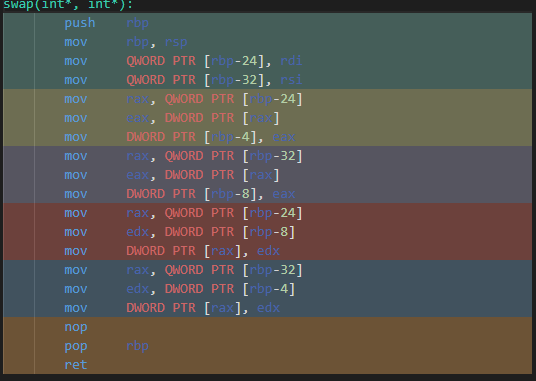

6. Create a similar function `swapl` that uses long integers instead
    - What's the difference in the assembly code?


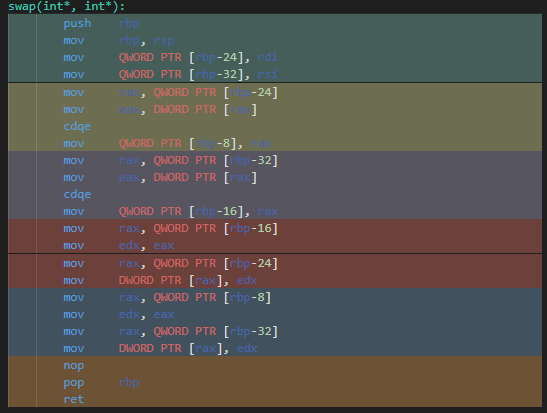

int tiene 32 bits, mientras que long tiene 64 bits. Por ende donde va 32 rn uno, será 64 en el otro, y las operaciones que se realizan irian de acorde a esos datos. 

7. Implement a function named `abs_diff` that calculates the absolute value of the difference of two inputs `a` and `b` (i.e., |a-b|), and get the assembly code output

#include <stdio.h>
#include <stdlib.h>
 
int main()
{
     
    int a,b;
    int resta;
 
    printf("a: ");
    scanf("%d",&a);
    printf("b: ");
    scanf("%d",&b);
 
    resta=abs(a-b);
 
    printf("\nLa resta es = %d",a,b,resta);
    return 0;
}


In [6]:
.LC0:
        .string "a: "
.LC1:
        .string "%d"
.LC2:
        .string "b: "
.LC3:
        .string "\nLa resta es = %d"
main:
        push    rbp
        mov     rbp, rsp
        sub     rsp, 16
        mov     edi, OFFSET FLAT:.LC0
        mov     eax, 0
        call    printf
        lea     rax, [rbp-8]
        mov     rsi, rax
        mov     edi, OFFSET FLAT:.LC1
        mov     eax, 0
        call    __isoc99_scanf
        mov     edi, OFFSET FLAT:.LC2
        mov     eax, 0
        call    printf
        lea     rax, [rbp-12]
        mov     rsi, rax
        mov     edi, OFFSET FLAT:.LC1
        mov     eax, 0
        call    __isoc99_scanf
        mov     eax, DWORD PTR [rbp-8]
        mov     edx, DWORD PTR [rbp-12]
        sub     eax, edx
        mov     edx, eax
        neg     edx
        cmovns  eax, edx
        mov     DWORD PTR [rbp-4], eax
        mov     edx, DWORD PTR [rbp-12]
        mov     eax, DWORD PTR [rbp-8]
        mov     ecx, DWORD PTR [rbp-4]
        mov     esi, eax
        mov     edi, OFFSET FLAT:.LC3
        mov     eax, 0
        call    printf
        mov     eax, 0
        leave
        ret

Line 2: Invalid argument: "a: